In [24]:
# Import all the necessary packages

import numpy as np
import pandas as pd
import scipy
import uci_dataset as data
import random
random.seed(10)

# The results will depend on the random train-test split, so we average the accuracies over a certain number of repetitions
n_rep = 40

import wittgenstein3 as lw
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from datetime import datetime

In [25]:
# Define a dictionary with the datasets we want to consider when experimenting
# dfs = ...

In [26]:
# Dictionary of accuracies of standard RIPPERk on all datasets

stand_acc = {'Thyroid': 0.946, 'audiology': 0.9738, 'autism': 0.9968, 'adult': 0.7099, 'arrhythmia': 0.5262}

In [27]:
import time
from Helper import LearningCurvePlot, smooth


def average_over_repetitions(n_repetitions, smoothing_window, df, n_bins, class_feat, pos_class, name_test, verbosity = 0):
    acc = np.empty([n_repetitions, len(n_bins)]) # accuracies array
    start = datetime.now()
    start2 = time.time()
    
    for i in range(n_repetitions):
        for j in range(len(n_bins)):
            b = n_bins[j]
            X_train, X_test = train_test_split(df, test_size = 0.2)
            ripper_clf = lw.RIPPER(k=2, verbosity = verbosity, n_discretize_bins = b)
            ripper_clf.fit(X_train, class_feat = class_feat, pos_class = pos_class)
            y_test = X_test[class_feat]
            score = ripper_clf.score(X_test, y_test)
            acc[i,j] = score
        
    # Save results to a text file
    np.savetxt('Results/' + name_test + '_time' + start.strftime("%d-%m-%Y_%H.%M.%S"),acc,delimiter = ',')
    
    print('Running the test takes {} minutes'.format((time.time()-start2)/60))
    learning_curve = np.mean(acc, axis = 0) # average over repetitions
    learning_curve = smooth(learning_curve,smoothing_window) # additional smoothing
    return learning_curve, acc

def experiment(n_repetitions, DFs, verbosity = 0, n_bins = [3,5,10,15,20,30,50]):
    ####### Settings
    # Experiment    
    # Here DFs should be a dataframe with columns:
    #        data: containing the keys to a dictionary of dataframes
    #        class_feat: containing the class feature for each dataset
    #        pos_class: containing the name of the positive class
    
    # Plotting parameters
    plot = True
    smoothing_window = 2
    
    ####### Experiments
    
    #Plot1 = LearningCurvePlot(title = labels[problem] + ' problem solved with ' + labels[method])
    
    for name_test in DFs['tests']:
        Plot1 = LearningCurvePlot(title = name_test)
        Plot1.add_hline(stand_acc[name_test], 'standard' + name_test)
        class_feat = DFs['class'][DFs.tests == name_test][0]
        pos_class = DFs['pos'][DFs.tests == name_test][0]
        
        learning_curve, _ = average_over_repetitions(n_repetitions, smoothing_window, dfs[name_test], n_bins,
                                                            class_feat, pos_class, name_test, verbosity)
        Plot1.add_curve(learning_curve,label = name_test)
    Plot1.save(name_test + '_' + 'discr_bins' + '.png')

Now let's rerun the previous tests by looking at all the possible values of W.

# Thyroid dataset

In [28]:
df = data.load_thyroid_disease()

In [29]:
name_test = 'Thyroid'

In [30]:
dfs = {'Thyroid':df}

In [31]:
DFs = pd.DataFrame({'tests': [name_test], 'class': ['sick-euthyroid'], 'pos': ['sick-euthyroid']})

Running the test takes 10.492939019203186 minutes


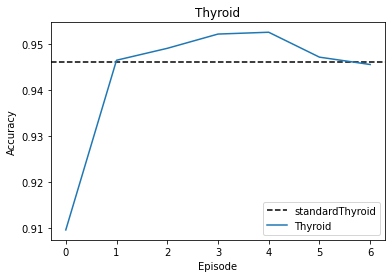

In [32]:
experiment(40, DFs)

# Audiology (Standardized) Data Set

In [33]:
df = data.load_audiology()

In [34]:
name_test = 'audiology'

In [35]:
dfs = {'audiology':df}

In [36]:
DFs = pd.DataFrame({'tests': [name_test], 'class': ['Class'], 'pos': ['cochlear_poss_noise']})

Running the test takes 1.7014448602994283 minutes


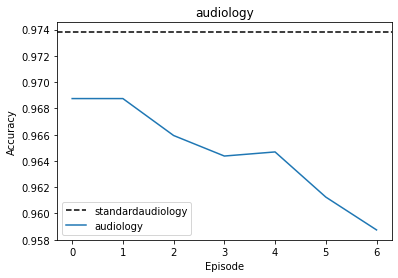

In [37]:
experiment(40, DFs)

# Autism Screening Dataset

In [38]:
df = data.load_autism_screening()

In [39]:
name_test = 'autism'

In [40]:
dfs = {'autism':df}

In [41]:
DFs = pd.DataFrame({'tests': [name_test], 'class': ['Class/ASD'], 'pos': ['YES']})

Running the test takes 1.1569607535998025 minutes


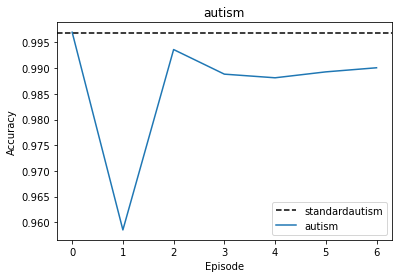

In [42]:
experiment(40, DFs)

# Adult Data Set

In [43]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

In [44]:
name_test = 'adult'

In [45]:
dfs = {'adult':df}

In [46]:
DFs = pd.DataFrame({'tests': [name_test], 'class': [' <=50K'], 'pos': [' <=50K']})

Running the test takes 303.4701517701149 minutes


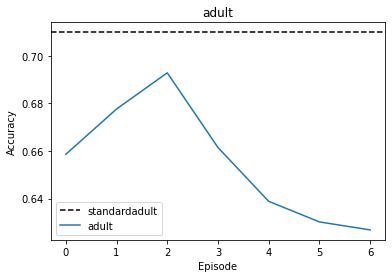

In [47]:
experiment(40, DFs)

# Arrhythmia Data Set 

In [48]:
df = data.load_arrhythmia()

In [49]:
name_test = 'arrhythmia'

In [50]:
dfs = {'arrhythmia':df}

In [51]:
DFs = pd.DataFrame({'tests': [name_test], 'class': ['diagnosis'], 'pos': [1]})

Running the test takes 73.8647405187289 minutes


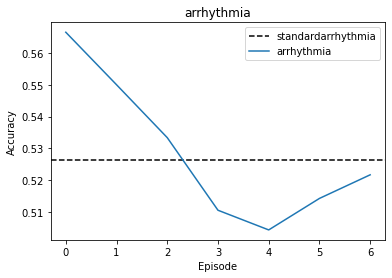

In [52]:
experiment(40, DFs)

In [8]:
from sklearn.model_selection import GroupKFold
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [9]:
import pandas as pd
import scipy
import uci_dataset as data
import random
random.seed(10)

In [10]:
df = data.load_arrhythmia()

In [14]:
X

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279
0,75,0,190,80,91,193,371,174,121,-16,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75,0,190,80,88,181,360,177,103,-16,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5
448,37,0,190,85,100,137,361,201,73,86,...,-0.5,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4
449,36,0,166,68,108,176,365,194,116,-85,...,1.2,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2
450,32,1,155,55,93,106,386,218,63,54,...,0.2,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6
